# Bike Sharing 데이터 소개

📌 데이터 개요

Bike Sharing 데이터는 자전거 대여 시스템의 사용 패턴을 예측하기 위한 데이터셋입니다. 계절, 날씨, 시간대, 휴일 여부 등의 정보를 바탕으로 대여 수요를 예측하는 데 사용할 수 있으며, 회귀 신경망 모델의 실습용 데이터로 매우 적합합니다.

이 데이터는 실제 미국 워싱턴 D.C.에 있는 Capital Bikeshare 서비스의 사용 기록에서 추출되었습니다.


🗂️ 데이터 파일

hour.csv: 시간 단위 자전거 대여 데이터 (총 17,000건 이상)

day.csv: 일 단위 자전거 대여 데이터

이번 실습에서는 hour.csv를 사용하여 시간별 자전거 대여 수요를 예측하는 모델을 만듭니다.


데이터 셋의 다운로드 경로

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


| 컬럼 이름     | 설명 |
|---------------|------|
| `instant`     | 데이터의 순번 (고유 ID) |
| `dteday`      | 날짜 정보 (예: 2012-12-19) |
| `season`      | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울) |
| `yr`          | 연도 (0: 2011년, 1: 2012년) |
| `mnth`        | 월 (1~12) |
| `holiday`     | 공휴일 여부 (0: 평일, 1: 공휴일) |
| `weekday`     | 요일 (0: 일요일, ..., 6: 토요일) |
| `workingday`  | 근무일 여부 (0: 주말/휴일, 1: 평일) |
| `weathersit`  | 날씨 상황  1 - 맑음, 구름 약간, 2 - 안개, 구름 많음,  |
|| 3 - 가벼운 눈비, 약간 흐림,  4 - 폭우/눈 (드물게 등장) |
| `temp`        | 실제 기온 (0~1 사이 정규화됨) |
| `atemp`       | 체감 온도 (0~1 사이 정규화됨) |
| `hum`         | 습도 (0~1 사이 정규화됨) |
| `windspeed`   | 풍속 (0~1 사이 정규화됨) |
| `casual`      | 비회원 대여 수 |
| `registered`  | 회원 대여 수 |
| `cnt`         | **전체 자전거 대여 수 (예측 대상)** |


🎯 예측 목표

주어진 시간과 환경 조건을 바탕으로 cnt 값을 예측하는 회귀 신경망 모델을 설계하고 학습합니다.

#딥러닝 학습 프로세스

기본 프로세스에서 데이터 전처리 단계가 추가되었습니다.

1. 필요한 라이브러리 가져오기
2. 데이터 로딩
3. 데이터 전처리
4. Sequential API를 이용한 모델 구조 정의
5. 모델 컴파일
6. 모델 학습
7. 모델 평가
8. 예측 수행
9. 시각화

# 1. 라이브러리 가져오기

In [3]:
# 여기에 코드를 작성해보세요!
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-04-25 04:22:26.551015: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 04:22:26.781247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-25 04:22:26.781508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-25 04:22:26.816336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-25 04:22:26.898805: I tensorflow/core/platform/cpu_feature_guar

# 2. 데이터 로딩

다운로드한 데이터 파일 `day.csv` 을 런타임 파일로 업로드합니다.


In [ ]:
# 여기에 코드를 작성해보세요!

In [4]:
df = pd.read_csv('./day.csv')
#df.info()

## 학습에 사용할 데이터 정의
 X: 독립변수, 연속형 위주로 선택 (범주형은 원핫인코딩 필요)   
 y: 종속변수/타겟, cnt (전체 대여량)

In [ ]:
# 여기에 코드를 작성해보세요!

In [5]:
X = df[['temp', 'atemp', 'hum', 'windspeed']].values
y = df['cnt'].values


# 3. 데이터 전처리


## 입력값의 표준화 (Standardization) :

각 특성(feature)의 값을 평균 0, 표준편차 1로 변환하는 작업
  - 신경망은 입력 값의 스케일에 민감함 (값이 크면 더 많이 반영될 수 있음)
  - 표준화를 통해 모든 특성이 동등한 중요도로 학습에 반영되도록 함
- `StandardScaler` (scikit-learn) 객체를 이용
- **표준화 수식**:      (x: 원래 값, μ: 평균, σ: 표준편차)

$$
z = \frac{x - \mu}{\sigma}
$$


In [ ]:
# 여기에 코드를 작성해보세요!

In [6]:
#StandardScaler 객체를 생성하고,
scaler = StandardScaler()

#fit_transformed() 에 특성 데이터(X)를 넣어 표준화를 수행한다.
X_scaled = scaler.fit_transform(X)


## 훈련/테스트 데이터 분리

- `train_test_split` 함수는 데이터를 모델이 학습하는 데이터와 학습하지 않은 데이터로 성능을 검증하기 위해 데이터셋을 나눔.

  - `test_size=0.2`: 전체 데이터 중 20%를 테스트셋으로 사용
  - `random_state=42`: 데이터 분할의 일관성을 위해 고정된 난수 시드 사용

- 출력
  - `X_train`, `y_train`: 학습에 사용되는 입력과 정답
  - `X_test`, `y_test`: 검증에 사용되는 입력과 정답


In [ ]:
# 여기에 코드를 작성해보세요!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 4. 모델 구조 정의

실습을 위해 구성한 자전거 수요 예측 회귀 신경망 모델 구조는 다음과 같습니다.

| 층 (Layer)             | 뉴런 수 | 활성화 함수 | 설명 |
|------------------------|---------|--------------|------|
| 입력층 + 첫 번째 은닉층 | 64개    | ReLU         | 입력 특성을 받아 비선형 변환 수행.
| | | | 입력 크기는 `X_train.shape[1]` (특성 수) |
| 두 번째 은닉층         | 32개    | ReLU         | 더 깊은 패턴 추출을 위한 중간층 |
| 출력층                 | 1개     | 없음 (선형)  | 연속적인 수치를 출력하는 회귀 문제용 출력층 |


## 첫 번째 은닉층 (Hidden Layer)

- Dense: 완전 연결층(Fully Connected Layer), 노드 수 64개
- input_shape: 입력 특성의 수 (X_train.shape[1] = 특성 개수)
- activation='relu': ReLU(Rectified Linear Unit) 함수로 비선형성을 추가하여 복잡한 관계를 학습할 수 있게 함

## 두 번째 은닉층
- 노드 수 32개로 줄이면서 점점 더 요약된 정보를 학습함
- 마찬가지로 활성화 함수는 ReLU

## 출력층
- 노드 수: 1 → 예측해야 할 출력값이 1개 (자전거 대여 수는 하나의 연속된 값)
- 활성화 함수는 설정하지 않음 → 회귀 문제에서는 출력층에서 선형(linear) 활성화 함수가 기본

In [ ]:
# 여기에 코드를 작성해보세요!

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


2025-04-25 04:25:10.192856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 04:25:10.192926: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 04:25:10.192949: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 04:25:10.192954: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2345] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-04-25 04:25:10.373501: I external/lo

# 5. 컴파일

모델 학습을 위한 설정을 수행합니다.

- optimizer='adam': 학습 방법(가중치를 어떻게 조정할지)
- loss='mse': 손실 함수 (예측값과 실제값의 차이 측정, 평균 제곱 오차)
- metrics=['mae']: 학습 성능 확인용 지표 (평균 절대 오차)

In [ ]:
# 여기에 코드를 작성해보세요!

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. 모델 학습

모델의 학습은 신경망이 중요한 특징을 학습하는 과정입니다.   
모델에게 입력 데이터 (X_train) 와 정답(y_train)을 알려주고 지정한 횟수 (epoch) 만큼 반복해서 가중치를 조정하는 과정입니다.   
학습 과정에서 실제 정답과 비교해서 오차를 계산하고 오차가 작아지도록 가중치를 조정(w의 업데이트)합니다.   
History 변수: model.fit() 즉, 모델 학습 도중 계산한 손실값(loss), 정확도(metrics) 등을 담은 객체 입니다.   이 객체를 history로 저장하면, 나중에 학습 곡선 시각화가 가능합니다



실제 데이터를 이용해 학습을 위한 파라미터를 지정하여 모델을 학습시켜 봅니다.


### 모델 학습 파라미터 정리

| 매개변수               | 설정값           | 설명 |
|------------------------|------------------|------|
| `X_train`, `y_train`   | -                | 입력 데이터와 정답 (훈련용) |
| `epochs`               | `100`            | 전체 데이터를 학습할 횟수 (반복 횟수) |
| `batch_size`           | `16`             | 한 번에 학습에 사용하는 데이터 묶음 수 (미니배치 단위) |
| `validation_split`     | `0.2`            | 훈련 데이터의 20%를 검증용으로 자동 분할 |
| `verbose`              | `0`              | 학습 과정 출력 방식 (0: 출력 없음, 1: 진행 바, 2: 줄바꿈 출력) |
| `history`              | 반환값           | 학습 과정 중 손실 및 지표 변화를 저장하는 객체 |


In [ ]:
# 여기에 코드를 작성해보세요!

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_split=0.2, verbose=0)

2025-04-25 04:25:54.957935: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 12.0
2025-04-25 04:25:54.957967: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2025-04-25 04:25:54.958024: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-04-25 04:25:57.128451: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-04-25 04:25:57.128532: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-04-25 04:25:57.128572: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191]

# 7. 모델 평가

회귀 모델은 수치를 예측합니다.   
테스트 데이터를 이용해 모델의 예측값과 실제값이 얼마나 가까운지를 수치로 평가합니다.   
- MAE : Mean Absolute Error, 절대 오차의 평균
- MSE : Mean Squared Error 제곱 오차의 평균
- RMSE : Root MSE, MSE의 제곱근

model.evaluate(): 학습된 모델에 대해 테스트셋 성능을 평가합니다.

- X_test: 입력 데이터
- y_test: 실제 정답 라벨

평가 결과는 컴파일 시 지정한 metrics 순서대로 반환됩니다.

예: loss='mse', metrics=['mae']이면 → [MSE 값, MAE 값] 반환



In [ ]:
# 여기에 코드를 작성해보세요!

In [11]:
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 손실 (MSE): {loss:.2f}")
print(f"테스트 평균 절대 오차 (MAE): {mae:.2f}")


5/5 [==============================] - 0s 3ms/step - loss: 2239407.2500 - mae: 1251.5094
테스트 손실 (MSE): 2239407.25
테스트 평균 절대 오차 (MAE): 1251.51


# 8. 예측 수행

모델의 학습이 끝난 후, 모델에 새로운 데이터를 넣으면 모델이 학습한 규칙에 따라 예측값(출력)을 계산하는 과정입니다.    
- 학습에 사용하지 않은 새로운 입력 데이터를 전달합니다.    
- predict()의 결과는 (샘플수,1) 형태의 2차원 배열입니다.    
- 그래프 시각화나 반복문 출력시 1차원으로 바꾸면 더 편리합니다. -> .flatten()으로 출력 형태 만들기
- 예측값과 실제값을 출력했을 때, 값이 비슷할 수록 모델 성능이 좋다는 의미입니다.

테스트 입력 데이터에 대해 예측 수행합니다.
- flatten(): 1차원 배열 (N,)로 변환하여 다루기 쉽게 만듦

In [ ]:
# 여기에 코드를 작성해보세요!

In [12]:
y_pred = model.predict(X_test).flatten()  #  결과는 (N, 1) 형태의 2차원 배열

#10개의 테스트 데이터의 실제 정답과 예측값 출력
for i in range(10):
    print(f"실제값: {y_test[i]:.1f}, 예측값: {y_pred[i]:.1f}")


5/5 [==============================] - 0s 2ms/step
실제값: 6606.0, 예측값: 4127.0
실제값: 1550.0, 예측값: 2922.1
실제값: 3747.0, 예측값: 3213.0
실제값: 6041.0, 예측값: 3931.7
실제값: 7538.0, 예측값: 4849.1
실제값: 7264.0, 예측값: 6055.2
실제값: 1605.0, 예측값: 2562.3
실제값: 2209.0, 예측값: 3077.8
실제값: 7499.0, 예측값: 6945.0
실제값: 5743.0, 예측값: 5427.7


# 9. 시각화

## 예측 결과 시각화

- 모델이 실제로 잘 예측하고 있는지 예측 결과 그래프로 확인합니다.    
- 오차 그래프 : Residual Plot – 예측값과 예측 오차 간의 관계를 시각화한 것    
- 모델의 예측 품질과 오차의 패턴을 분석하는데 유용합니다.    
- 오차(residual)가 특정 방향으로 쏠려 있다면 → 모델이 잘못된 패턴을 학습했을 수 있으며, 오차가 무작위로 분포하면 좋은 모델입니다.

### 오차 그래프 작성
1. 잔차(residuals) = 실제값 – 예측값  → 즉, 모델이 예측을 얼마나 틀렸는지를 계산합니다.
2. 잔차 산점도(Residual Plot)
- x축: 모델이 예측한 값 (y_pred)
- y축: 예측 오차 (residuals)
3. y=0인 수평선(빨간 점선, 오차가 없는 경우)을 기준선으로 표시합니다.   
모든 점이 이 선에 가까우면 예측이 정확한 것이고,
멀어질수록 오차가 큰 것을 뜻합니다.


In [ ]:
# 여기에 코드를 작성해보세요!

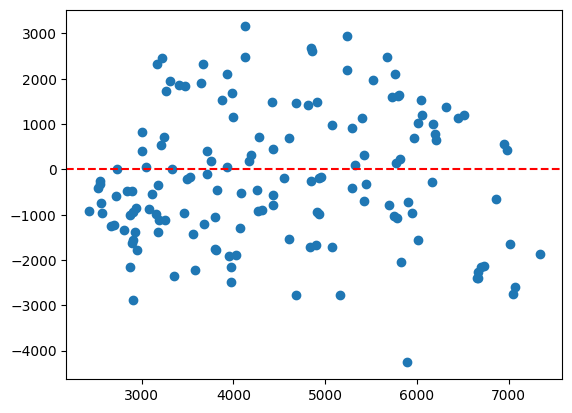

In [14]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')


## 학습중 손실의 변화 추이 시각화

모델의 학습 중 손실(loss)의 변화 추이를 그래프로 그려 모델이 학습을 잘 하고 있는지, 과적합은 없는지 확인합니다.   
학습 데이터에 대한 손실값 변화를 에포크(epoch)  별로 선 그래프로 그립니다.   
그래프의 왼쪽은 초기 학습, 오른쪽으로 갈 수록 후반 학습 상태입니다.


- history.history['loss']는 model.fit()이 자동으로 저장해준 값
- history.history[‘val_loss'] 검증 데이터(validation set)에 대한 손실값

- 파랑색선 : 에포크(epoch)별 훈련 데이터 손실 (MSE 기준)
- 주황색선 : 에포크별 검증 데이터 손실 (MSE 기준)


In [ ]:
# 여기에 코드를 작성해보세요!

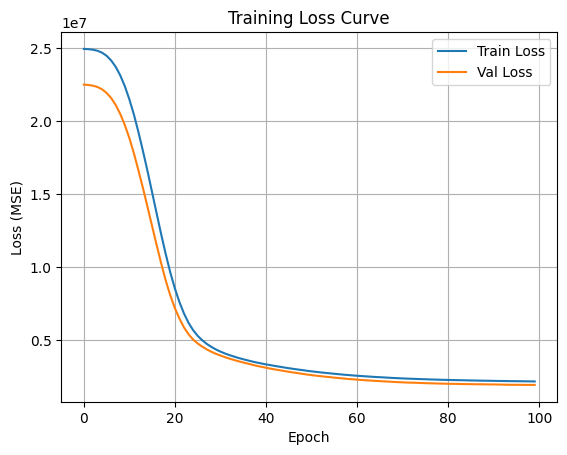

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## 평가 결과의 해석

Train Loss와 Val Loss가 모두 감소하고 있다면 → 모델이 잘 학습되고 있음   
Val Loss가 오히려 증가하고 있다면 → 과적합 가능성 있음   
Loss가 진동하거나 급증한다면 → 학습률 조절 필요